In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/ayush/OneDrive/Desktop/IBM Data Science/Tools for Data Science/data.csv/data.csv")

In [2]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [5]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [3]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'],axis=1)

In [4]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })

In [5]:
df.shape

(11914, 10)

In [25]:
help(df.duplicated)

Help on method duplicated in module pandas.core.frame:

duplicated(subset: 'Optional[Union[Hashable, Sequence[Hashable]]]' = None, keep: 'Union[str, bool]' = 'first') -> 'Series' method of pandas.core.frame.DataFrame instance
    Return boolean Series denoting duplicate rows.
    
    Considering certain columns is optional.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', False}, default 'first'
        Determines which duplicates (if any) to mark.
    
        - ``first`` : Mark duplicates as ``True`` except for the first occurrence.
        - ``last`` : Mark duplicates as ``True`` except for the last occurrence.
        - False : Mark all duplicates as ``True``.
    
    Returns
    -------
    Series
        Boolean series for each duplicated rows.
    
    See Also
    --------
    Index.duplicated : E

In [5]:
df_duplicate = df[df.duplicated(keep='first')==True]

In [6]:
df_duplicate.shape

(989, 10)

In [7]:
df.count(axis=0)

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [38]:
help(df.count)

Help on method count in module pandas.core.frame:

count(axis=0, level=None, numeric_only=False) method of pandas.core.frame.DataFrame instance
    Count non-NA cells for each column or row.
    
    The values `None`, `NaN`, `NaT`, and optionally `numpy.inf` (depending
    on `pandas.options.mode.use_inf_as_na`) are considered NA.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        If 0 or 'index' counts are generated for each column.
        If 1 or 'columns' counts are generated for each row.
    level : int or str, optional
        If the axis is a `MultiIndex` (hierarchical), count along a
        particular `level`, collapsing into a `DataFrame`.
        A `str` specifies the level name.
    numeric_only : bool, default False
        Include only `float`, `int` or `boolean` data.
    
    Returns
    -------
    Series or DataFrame
        For each column/row the number of non-NA/null entries.
        If `level` is specified returns a `

In [8]:
df = df.drop_duplicates()

In [7]:
df.shape

(10925, 10)

In [8]:
df.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.count(axis=0)

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [11]:
df.isnull().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64

In [11]:
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [58]:
df['Price']

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: Price, Length: 10827, dtype: int64

<AxesSubplot:xlabel='Price'>

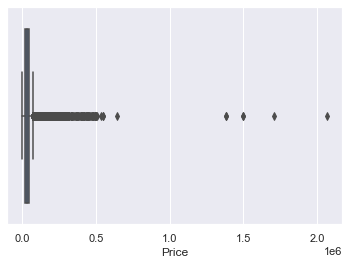

In [60]:
sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='HP'>

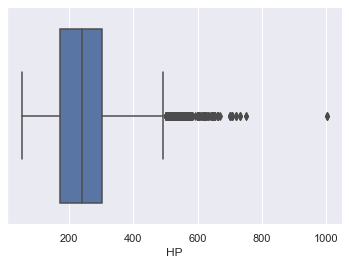

In [61]:
sns.boxplot(x=df['HP'])

<AxesSubplot:xlabel='Cylinders'>

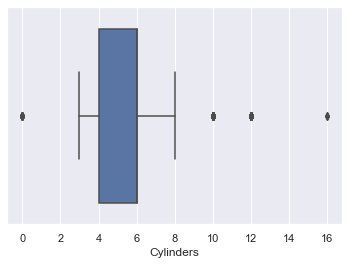

In [62]:
sns.boxplot(x=df['Cylinders'])

In [63]:
help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
    Draw a box plot to show distributions with respect to categories.
    
    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` para

In [12]:
Q1 = df.quantile(0.25)

In [13]:
Q2 = df.quantile(0.75)

In [19]:
df.dtypes

Make             object
Model            object
Year              int64
HP              float64
Cylinders       float64
Transmission     object
Drive Mode       object
MPG-H             int64
MPG-C             int64
Price             int64
dtype: object

In [14]:
IQR = Q2-Q1

In [15]:
IQR

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64

In [73]:
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
df1 = df[~(df<(Q1-1.5*IQR))|(df>(Q1+1.5*IQR)).any(axis=1)]

<ipython-input-16-7efa6b00c4fe>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df[~(df<(Q1-1.5*IQR))|(df>(Q1+1.5*IQR)).any(axis=1)]
<ipython-input-16-7efa6b00c4fe>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df[~(df<(Q1-1.5*IQR))|(df>(Q1+1.5*IQR)).any(axis=1)]


In [ ]:
df1.shape